In [ ]:

! pip install -q kaggle


In [ ]:


from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jamilakoroma","key":"9340827e2a3443e95f8b4fb7a0494f8f"}'}

In [ ]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json



In [ ]:
! kaggle datasets list



ref                                                       title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sazidthe1/data-science-salaries                           Data Science Salaries 2024                   57KB  2024-01-20 16:45:27            890         28  1.0              
michau96/social-media-popularity-2009-2023                Social media popularity (2009 - 2023)         5KB  2024-01-16 16:45:09            704         21  0.9411765        
hummaamqaasim/jobs-in-data                                Jobs and Salaries in Data Science            76KB  2023-12-25 20:03:32           8193        167  1.0              
nelgiriyewithana/apple-quality                            Apple Quality                               170KB  2024-01-11 14:31:07  

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:01<00:00, 84.5MB/s]
100% 163M/163M [00:01<00:00, 87.4MB/s]


# New section

In [ ]:
!unzip face-mask-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [ ]:

import pandas as pd
import numpy as np
from glob import glob
import cv2
import os

In [ ]:
with_mask ='/content/data/with_mask'
without_mask='/content/data/without_mask'

In [ ]:
images=[]
labels=[]

In [ ]:
#without_mask dateset
for filename in os.listdir(without_mask):
  if filename.endswith('.jpg'):
    img = cv2.imread(os.path.join(without_mask, filename))
    img = cv2.resize(img,(128,128))
    images.append(img)
    labels.append(0)  #0 represents with mask


In [ ]:
#with_mask dataset
for filename in os.listdir(with_mask):
  if filename.endswith('.jpg'):
    img = cv2.imread(os.path.join(with_mask, filename))
    img = cv2.resize(img,(128,128))
    images.append(img)
    labels.append(1)  #1 represents without mask

In [ ]:
#convert list to numpy
images =np.array(images)
labels = np.array(labels)

#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
images = images / 255.0

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes: with and without mask
])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
152/152 [==============================] - 122s 792ms/step - loss: 0.3811 - accuracy: 0.8508 - val_loss: 0.3433 - val_accuracy: 0.8635
Epoch 2/10
152/152 [==============================] - 117s 770ms/step - loss: 0.2225 - accuracy: 0.9125 - val_loss: 0.2679 - val_accuracy: 0.8875
Epoch 3/10
152/152 [==============================] - 119s 781ms/step - loss: 0.1647 - accuracy: 0.9361 - val_loss: 0.2466 - val_accuracy: 0.8933
Epoch 4/10
152/152 [==============================] - 120s 790ms/step - loss: 0.1220 - accuracy: 0.9565 - val_loss: 0.3136 - val_accuracy: 0.8950
Epoch 5/10
152/152 [==============================] - 119s 785ms/step - loss: 0.0903 - accuracy: 0.9673 - val_loss: 0.3137 - val_accuracy: 0.8883
Epoch 6/10
152/152 [==============================] - 116s 762ms/step - loss: 0.0650 - accuracy: 0.9787 - val_loss: 0.3063 - val_accuracy: 0.9032
Epoch 7/10
152/152 [==============================] - 115s 758ms/step - loss: 0.0882 - accuracy: 0.9717 - val_loss: 0.3004 -

In [ ]:
# Evaluate model
test_loss, test_acc =model.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy:{test_acc}')


48/48 - 14s - loss: 0.3996 - accuracy: 0.9047 - 14s/epoch - 286ms/step
Test Accuracy:0.9046988487243652


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
sample_image= x_test[3]
predictions= model.predict(np.expand_dims(sample_image, axis=0))
predicted_label=np.argmax(predictions)


1/1 [==============================] - 0s 155ms/step


In [ ]:
class_labels = ['with_mask','without_mask']
predicted_class = class_labels[predicted_label]
print(f'predicted class :{predicted_class}')


predicted class :with_mask


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

# the true labels are in y_test
true_labels = y_test

# Predicted probabilities
predicted_probs = model.predict(x_test)

# Apply a threshold to convert probabilities to binary predictions
threshold = 0.5  # Adjust the threshold as needed
predicted_labels = (predicted_probs[:, 1] > threshold).astype(int)

# F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Weighted average precision, recall, and accuracy
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(true_labels, predicted_labels)

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print(f'F1 Score: {f1}')
print(f'Weighted Average Precision: {precision}')
print(f'Weighted Average Recall: {recall}')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

# Find the optimal threshold
threshold_values = np.arange(0.1, 1.0, 0.1)
best_threshold = None
best_f1_score = 0

for threshold in threshold_values:
    thresholded_predictions = (model.predict(x_test)[:, 1] > threshold).astype(int)
    f1 = f1_score(true_labels, thresholded_predictions, average='weighted')

    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f'Optimal Threshold for F1 Score: {best_threshold}')


48/48 [==============================] - 10s 208ms/step
F1 Score: 0.9045690641855385
Weighted Average Precision: 0.9100657808319469
Weighted Average Recall: 0.9046988749172733
Accuracy: 0.9046988749172733
Confusion Matrix:
[[665 114]
 [ 30 702]]
48/48 [==============================] - 11s 228ms/step
Optimal Threshold for F1 Score: 0.9


48/48 [==============================] - 11s 217ms/step


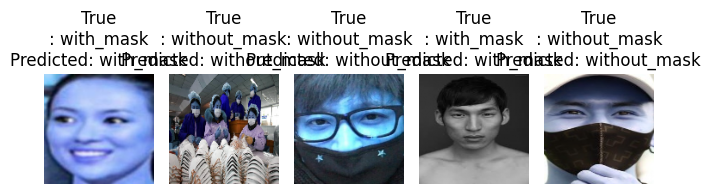

In [ ]:
import matplotlib.pyplot as plt
import random

# Assuming the true labels are in y_test
true_labels = y_test

# Predicted probabilities
predicted_probs = model.predict(x_test)

# Apply a threshold to convert probabilities to binary predictions
threshold = 0.5  # Adjust the threshold as needed
predicted_labels = (predicted_probs[:, 1] > threshold).astype(int)

# Visualize a few sample predictions
num_samples_to_visualize = 5
sample_indices = random.sample(range(len(x_test)), num_samples_to_visualize)

for i, idx in enumerate(sample_indices):
    sample_image = x_test[idx]
    true_label = class_labels[true_labels[idx]]
    predicted_label = class_labels[predicted_labels[idx]]

    plt.subplot(1, num_samples_to_visualize, i + 1)
    plt.imshow(sample_image)
    plt.title(f'True\n: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


48/48 [==============================] - 10s 217ms/step


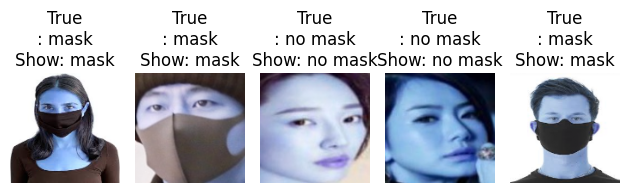

In [ ]:
import matplotlib.pyplot as plt
import random

# Assuming the true labels are in y_test
true_labels = y_test

# Predicted probabilities
predicted_probs = model.predict(x_test)

# Apply a threshold to convert probabilities to binary predictions
threshold = 0.5  # Adjust the threshold as needed
predicted_labels = (predicted_probs[:, 1] > threshold).astype(int)

# Visualize a few sample predictions
num_samples_to_visualize = 5
sample_indices = random.sample(range(len(x_test)), num_samples_to_visualize)

for i, idx in enumerate(sample_indices):
    sample_image = x_test[idx]
    true_label = class_labels[true_labels[idx]]
    predicted_label = class_labels[predicted_labels[idx]]

    # Correct the label names
    true_label = "mask" if true_label == "without_mask" else "no mask"
    predicted_label = "mask" if predicted_label == "without_mask" else "no mask"

    plt.subplot(1, num_samples_to_visualize, i + 1)
    plt.imshow(sample_image)
    plt.title(f'True\n: {true_label}\nShow: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()
